## MultiVI test

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import anndata
import os 
from scipy.sparse import csr_matrix
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import random
from scipy import stats
from sklearn.metrics import roc_auc_score, average_precision_score
import xchrom as xc

In [2]:
input_path = '../'
save_path = './Results/'
adata_atac = sc.read_h5ad(f'{input_path}/0_preprocess/processed_data/test_atac.h5ad')  ## cross-samples test label
pred_test = sc.read_h5ad(f'{save_path}/multivi_impute.h5ad')  ## cross-samples test prediction

### test cell auROC&auPRC

In [3]:
m_to1 = adata_atac.X.copy()  
m_to1[m_to1 != 0] = 1  # binaries
pred = pred_test.X
true = m_to1.toarray()

In [4]:
## -1 Calculate overall auROC & auPRC 
overall_metrics = xc.tl.calc_auc_pr(true, pred, 'overall')
print(f"Overall auROC: {overall_metrics['auroc']:.4f}, auPRC: {overall_metrics['auprc']:.4f}")

## -2 Calculate per cell auRPC & auPRC
cell_metrics = xc.tl.calc_auc_pr(true, pred, 'percell')
print(f"Per-cell auROC: {cell_metrics['auroc']:.4f}, auPRC: {cell_metrics['auprc']:.4f}")
print(f"Valid cells: {cell_metrics['n_cells']}")

## -3 Calculate per peak auROC & auPRC
peak_metrics = xc.tl.calc_auc_pr(true, pred, 'perpeak')
print(f"Per-peak auROC: {peak_metrics['auroc']:.4f}, auPRC: {peak_metrics['auprc']:.4f}")
print(f"Valid peaks: {peak_metrics['n_peaks']}")

Overall auROC: 0.8053, auPRC: 0.1686
Per-cell auROC: 0.8075, auPRC: 0.1670
Valid cells: 4220
Per-peak auROC: 0.6619, auPRC: 0.0753
Valid peaks: 53735


### test cell ns&ls

In [5]:
rna = sc.read_h5ad(f'{input_path}/0_preprocess/processed_data/test_rna.h5ad') ## provide X_pca to compute neighbors
rna = xc.tl.calc_pca(rna,max_value=10,n_comps=32)

/home/miaoyuanyuan/miniconda3/envs/py3.8_tf2.6.0/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/miaoyuanyuan/miniconda3/envs/py3.8_tf2.6.0/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:842: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


neighbor score(100)=0.4480,label score(100)=0.8424
neighbor score(50)=0.3407,label score(50)=0.8777
neighbor score(10)=0.1655,label score(10)=0.9157


<AxesSubplot:title={'center':'cell_type'}, xlabel='UMAP1', ylabel='UMAP2'>

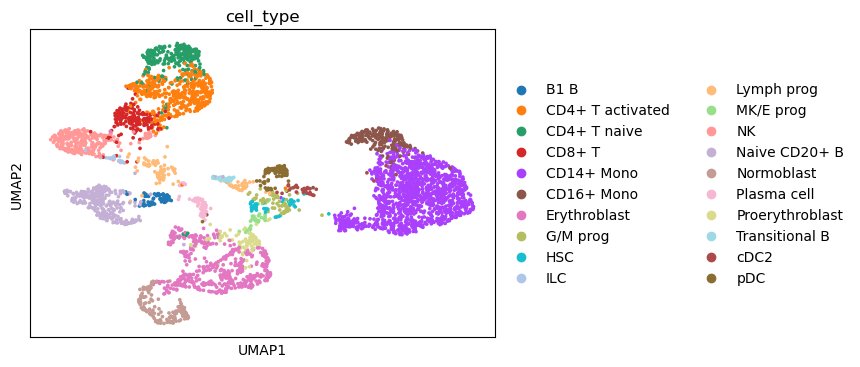

In [6]:
## Multivi impute
ad1 = xc.tl.calc_pca(pred_test)
ns,ls= xc.tl.calc_nsls_score(rna,ad1,100,'cell_type',use_rep_rna = 'X_pca',use_rep_atac='X_pca')
print(f'neighbor score(100)={ns:.4f},label score(100)={ls:.4f}')

ns,ls= xc.tl.calc_nsls_score(rna,ad1,50,'cell_type',use_rep_rna = 'X_pca',use_rep_atac='X_pca')
print(f'neighbor score(50)={ns:.4f},label score(50)={ls:.4f}')

ns,ls= xc.tl.calc_nsls_score(rna,ad1,10,'cell_type',use_rep_rna = 'X_pca',use_rep_atac='X_pca')
print(f'neighbor score(10)={ns:.4f},label score(10)={ls:.4f}')

f, ax = plt.subplots(1, 1, figsize=(6, 4))
sc.pl.umap(ad1, color='cell_type', ax=ax, show=False)